# Project: Movies Dataset

## Files to review:
- You can review the file called **```Assessing Data```** where I analyzed the dataset we are going to work with.
- I also did some data cleansing in the file called **```Data Cleansing and Data Wrangling```**
- In this notebook, we're going to answer some questions using visuals and descriptive statistics

<a id='table_of_contents'></a>

## Table of Contents
<ul>
<li><a href="#eda"><b>Exploratory Data Analysis</b></a></li>
<li><a href="#falfa"><b>Functions that I built</b></a></li>
<ul> 
<li><a href="#f1">Function for plotting</a></li>
<li><a href="#f2">Function creating top 10</a></li>
<li><a href="#f3">Function creating the top and worst 10 of any groupby statement</a></li>
<li><a href="#f3">Function for dropping columns</a></li>
</ul>
<li><a href="#single"><b>Single Variable Analysis</b></a></li>
<ul>    
<dd><li><a href="#qs1">Movies created per year</a></li></dd>
<li><a href="#qs2">Top 10 production companies</a></li>
<li><a href="#qs3">Top 10 Actors</a></li>
</ul>
<li><a href="#multiple"><b>Multiple Variable Exploration</b></a></li>
<ul>  
<li><a href="#qm1">Highest Revenue Per Year and from which movie</a></li>
<li><a href="#qm2">Top 10 Movies that generated most revenue</a></li>
<li><a href="#qm3">Revenue in Millions from 1960-2015</a></li>
<li><a href="#qm4">Movie that made the most money</a></li> 
<li><a href="#qm5">Movie that made the less money</a></li>
<li><a href="#qm6">What's the total revenue per genre?</a></li>
<li><a href="#qm7">Knowing which are the most popular genres</a></li>
<li><a href="#qm8">Top 10 Companies with most revenue</a></li> 
<li><a href="#qm9">Top 10 Companies with less revenue</a></li>
<li><a href="#qm10">Top 10 Best Paid Actors</a></li>  
<li><a href="#qm11">Top 10 Worst Paid Actors</a></li> 
<li><a href="#qm12">Average Revenue per Genre from 1960-2018</a></li>
</ul>
<li><a href="#correlation"><b>Correlation Analysis Exploration</b></a></li>
<ul> 
<li><a href="#qc1">Correlation between budget and revenue</a></li>
<li><a href="#qc1">Correlation between a Movie's Budget and its Popularity</a></li>
</ul>
<li><a href="#conclusions"><b>Conclusions</b></a></li>

<a id='intro'></a>
## Introduction

> I think movies is a topic we all like and feel familiar with and that's why I chose to work with this dataset. In the following sections **I'll be analyzing each of the questions stated above to understand more about this dataset and about the movie industry.**

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='eda'></a>
## Exploratory Data Analysis


> With the goal of addressing the research questions I used descriptive statistics to find insights and relationships between variables. I divided this work in 3 phases:

- **Functions that I built**
- **Single Variable Exploration**
- **Multiple Variable Exploration**
- **Correlation Analysis Exploration**

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

## Functions that I'm going to use:

This functions will allow me to:

- Plot More easily
- Groupby and the function will return a plot
- Discover the best top 10 or worst top 10 of any column
- Dropping Values for a given column

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

<a id='f1'></a>
> ### Function for plotting
I'm going to create a function that I'm going to call everytime I want to create a plot.

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

In [2]:
def plotTitle(title, xlabel, ylabel):
    """
    This is a function that I will call every time I want to create a plot 
    """
    plt.title(title, fontsize = 22)
    plt.xlabel(xlabel, labelpad = 15, fontsize = 18)
    plt.ylabel(ylabel, labelpad = 15, fontsize = 18) 

<a id='f2'></a>
> ### Function creating the top 10 of any column
I'm going to create a function that I'm going to call everytime I want to create a top 10.

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

In [3]:
def top10(column):
    """
    This function will help me to create the top 10 of any column and it will return a plot
    """
    top10 = df[column].value_counts()
    top10 = top10.nlargest(10).sort_values(ascending = True)
    return top10.plot(kind = 'barh', figsize =(12,8))

<a id='f3'></a>
> ### Function creating the top and worst 10 of any groupby statement
I'm going to create a function that I'm going to call everytime I want to a groupby and plot it.

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

In [4]:
def group_by_best10(data, column1, column2):
    """
    This function will return the top 10 of any groupby and it will return a plot
    """
    variable = df.groupby(column1)[column2].sum().sort_values(ascending = True)
    variable = variable.nlargest(10).sort_values(ascending = True)
    return variable.plot(kind = 'barh',figsize =(12,10), legend = True)

In [5]:
def group_by_worst10(data, column1, column2):
    """
    This function will return the worst 10 of any groupby and it will return a plot
    """
    variable = df.groupby(column1)[column2].sum().sort_values(ascending = True)
    variable = variable.nsmallest(10).sort_values(ascending = True)
    return variable.plot(kind = 'barh',figsize =(12,10), legend = True)

> ### Function for dropping columns

In [6]:
test_df = pd.read_csv('clean_dataset - Copy.csv')
def dropping():
    """
    This function will help me eliminate the genres that I don't want to analyze.
    """
    genres = ['Horror', 'Animation', 'Mystery', 'Music', 'War', 'Western', 'Documentary', 'TV Movie', 'Foreign', 'Fantasy', 'Family', 'Crime']
    for genre in genres:
        genre_over_time = test_df.drop(test_df.index[test_df['genres'] == genre], inplace = True)

<a id='single'></a>
## Single Variable Analysis

I'll be reviewing the behavior of:

- ```release_year```
- ```production_companies```
- ```cast```

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

<a id='q1'></a>
> ### Highest revenue per year, and from which movie
- The movie that made **1907.005842** Million USD Dollar in revenue is **Jaws**

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

In [7]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df = pd.read_csv('clean_dataset.csv')
df.head(2)

,id,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres,production_companies,cast
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,Action,Universal Studios,Chris Pratt
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,Action,Village Roadshow Pictures,Tom Hardy


In [8]:
df.drop_duplicates(subset = 'id' , inplace = True) 

In [9]:
df[df.budget_adj == 0]

,id,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres,production_companies,cast


In [10]:
sum(df.id.duplicated())

0

<a id='qs1'></a>
> ### Movies created per year

In [11]:
#just checking what are the descriptive statistics of the release_year column
df.release_year.describe()

count    3854.000000
mean     2001.261028
std        11.282575
min      1960.000000
25%      1995.000000
50%      2004.000000
75%      2010.000000
max      2015.000000
Name: release_year, dtype: float64

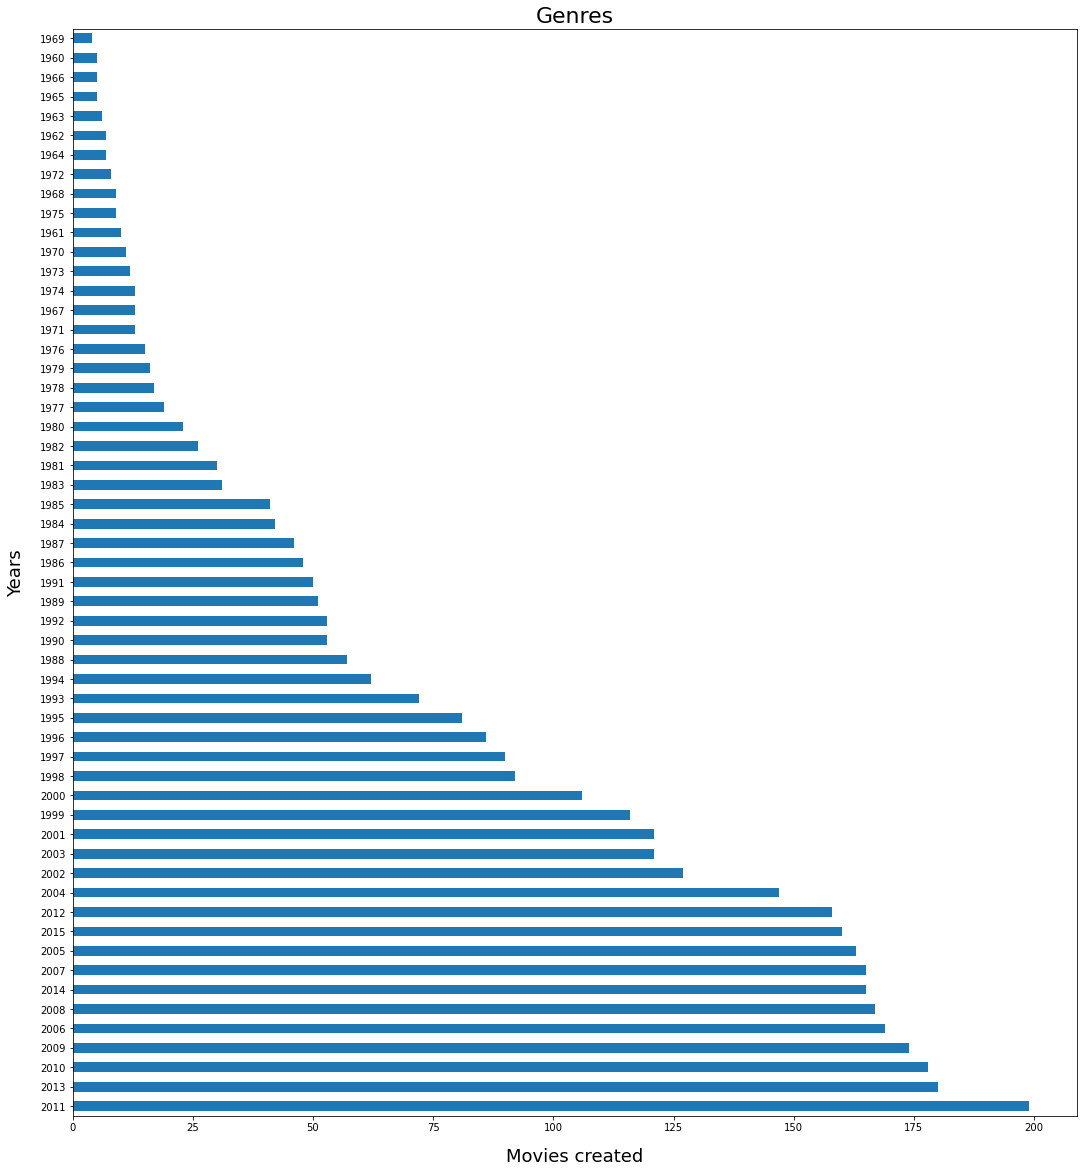

In [12]:
#creating th plot of the column
df['release_year'].value_counts().plot(kind = 'barh', figsize =(18,20))
plotTitle('Genres', 'Movies created', 'Years');

In our previous graph, we can appreciate that **the amount of movies created were incrementing throghout the years**

<a id='qs2'></a>
> ### Top 10 Production Companies

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

In [13]:
#just checking what are the descriptive statistics of the production_companies column
df.production_companies.describe()

count                   3808
unique                   894
top       Universal Pictures
freq                     283
Name: production_companies, dtype: object

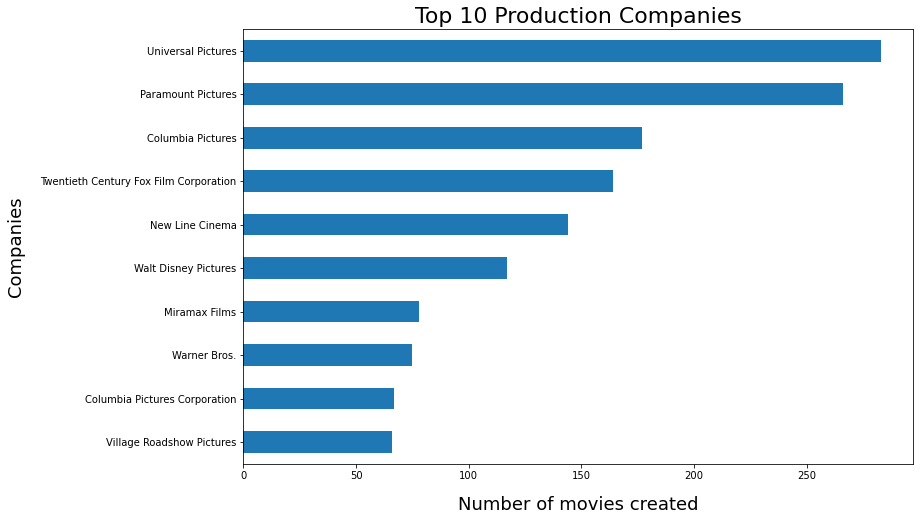

In [14]:
#creating th plot of the column
top10('production_companies')
plotTitle('Top 10 Production Companies', 'Number of movies created', 'Companies');

<a id='qs3'></a>
> ### Top 10 Actors

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

It looks that **Universal Pictures** is the company that has created the most movies in the dataset

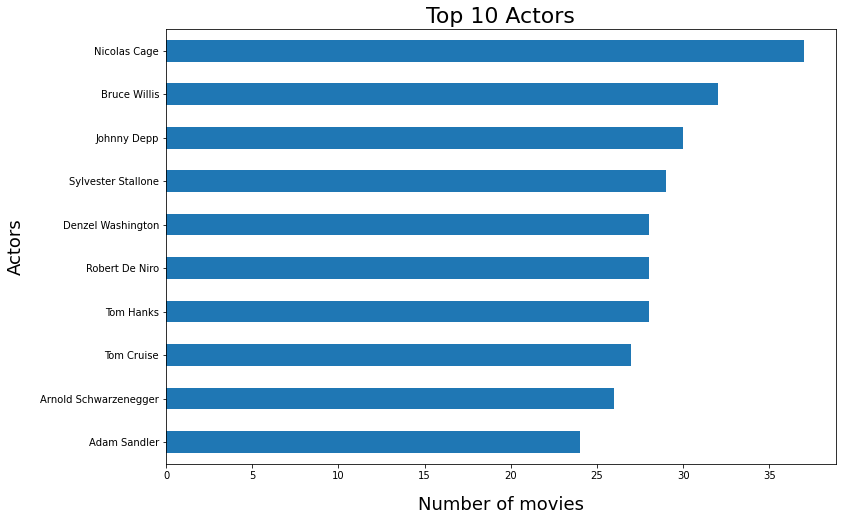

In [15]:
top10('cast')
plotTitle('Top 10 Actors', 'Number of movies', 'Actors');

It looks that **Nicolas Cage** has appeared in a lot of movies!

<a id='multiple'></a>
## Multiple Variable Exploration

I did a series of analysis for this phase, I was pretty excited I couldn't hold myself back, I suggest you go to the table of contents, if you want to review any given analysis. 

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

#### Creation of two new columns

Before I dive deeper into the analysis, I created two new columns and changed their datatypes to integers:
- ```revenue_in_millions```: The reason for this is so that the reader can read better the numbers in the graphs.
- ```budget_in_millions```: The reason for this is so that the reader can read better the numbers in the graphs.

I also eliminated the negative ```revenue_in_USD_2010``` values, because there were so little negative values, that it was biasing my visualizations.

In [16]:
df["revenue_adj"] = df["revenue_adj"].astype(int)

In [17]:
df["budget_adj"] = df["budget_adj"].astype(int)

In [18]:
df = df.rename(columns = {'revenue_adj': 'revenue_in_USD_2010', 'budget_adj': 'budget_in_USD_2010'}, inplace = False)

In [19]:
df['revenue_in_millions'] = df['revenue_in_USD_2010']/1000000

In [20]:
df['budget_in_millions'] = df['budget_in_USD_2010']/1000000

In [21]:
df = df[(df['revenue_in_millions'] >= 0)]

In [22]:
df.head(2)

,id,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_in_USD_2010,revenue_in_USD_2010,genres,production_companies,cast,revenue_in_millions,budget_in_millions
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,6/9/2015,5562,6.5,2015,137999939,1392445893,Action,Universal Studios,Chris Pratt,1392.445893,137.999939
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,5/13/2015,6185,7.1,2015,137999939,348161292,Action,Village Roadshow Pictures,Tom Hardy,348.161292,137.999939


<a id='qm1'></a>
> ### Highest Revenue Per Year and from which movie

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

In [24]:
pd.DataFrame(temp_df.groupby(['release_year']).agg({'revenue_in_millions':[max], 'original_title':['first']}))

,revenue_in_millions,original_title
,max,first
release_year,,
1960,442.378047,Spartacus
1961,1574.814740,One Hundred and One Dalmatians
1962,504.591421,Lawrence of Arabia
1963,561.773359,From Russia With Love
1964,878.080399,Goldfinger
1965,1129.534862,The Sound of Music
1966,226.643572,Who's Afraid of Virginia Woolf?
1967,1345.551059,The Jungle Book


<a id='qm2'></a>
> ### Top 10 Movies that generated most revenue

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

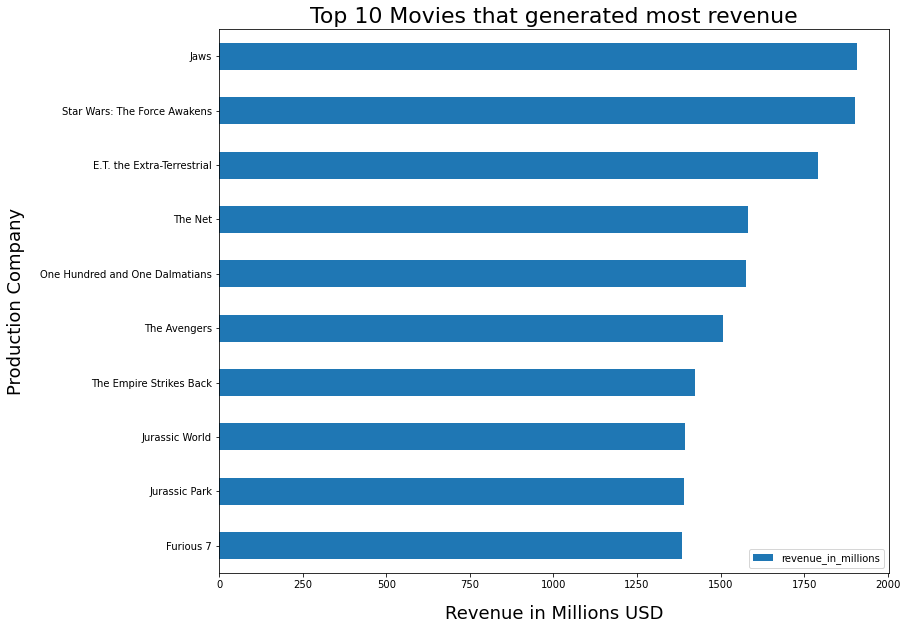

In [25]:
group_by_best10(data = df, column1 = 'original_title', column2 = 'revenue_in_millions')
plotTitle("Top 10 Movies that generated most revenue","Revenue in Millions USD", "Production Company")

<a id='qm3'></a>
> ### Revenue in Millions from 1960-2015
I created a temporary dataframe with the values of:
- ```release_year```
- ```revenue_in_millions```
- ```original_title```

> And then I just sorted the values from ```release_year``` and ```revenue_in_millions```. Once that I did this, I created a **line graph** to evaluate the revenue of the **best movies** from **1960-2015**.

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

In [23]:
temp_df = df[['release_year', 'revenue_in_millions', 'original_title']].sort_values(['release_year', 'revenue_in_millions'], ascending=False)

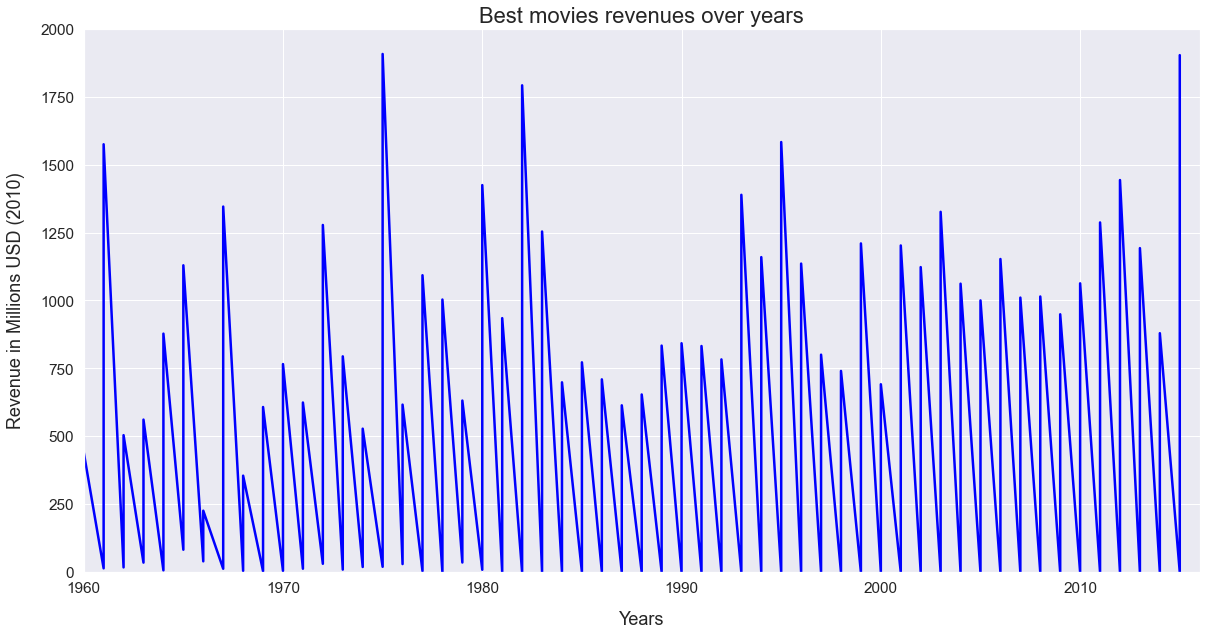

In [55]:
sns.set(font_scale=1.4)
temp_df.set_index('release_year')['revenue_in_millions'].plot(figsize=(20, 10), linewidth=2.5, color='blue', xlim = (1960, 2016), ylim = (0,2000))
#using the plotTitle Function that I created
plotTitle("Best movies revenues over years","Years", "Revenue in Millions USD (2010)")

You can see that there are a lot of peaks during the years, that's due that sometimes a really good movie comes out and a lot of people buy tickets for the cinemas.

<a id='qm4'></a>
> ### Movie that made the most money
I also wanted to review which movie has made most of the money in my dataset

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

In [27]:
df.loc[df['revenue_in_millions'].idxmax()]

id                                     578
popularity                         2.56319
original_title                        Jaws
director                  Steven Spielberg
runtime                                124
release_date                     6/18/1975
vote_count                            1415
vote_average                           7.3
release_year                          1975
budget_in_USD_2010                28362748
revenue_in_USD_2010             1907005842
genres                              Horror
production_companies    Universal Pictures
cast                          Roy Scheider
revenue_in_millions                1907.01
budget_in_millions                 28.3627
Name: 3543, dtype: object

<a id='qm5'></a>
> ### Movie that made the less money

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

In [28]:
df.loc[df['revenue_in_millions'].idxmin()]

id                                   13537
popularity                        0.462609
original_title             Shattered Glass
director                         Billy Ray
runtime                                 94
release_date                    11/14/2003
vote_count                              46
vote_average                           6.4
release_year                          2003
budget_in_USD_2010                 7112115
revenue_in_USD_2010                      2
genres                               Drama
production_companies      Lions Gate Films
cast                    Hayden Christensen
revenue_in_millions                  2e-06
budget_in_millions                 7.11212
Name: 1732, dtype: object

<a id='qm6'></a>
> ### What's the total revenue per genre?
- To do this I created a groupby of a new column named ```value``` which has all the genres from each movie and I grouped it with the variable ```revenue_in_millions```

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

In [29]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
genres_revenue = df.groupby('genres')["revenue_in_millions"].sum().sort_values(ascending = True)

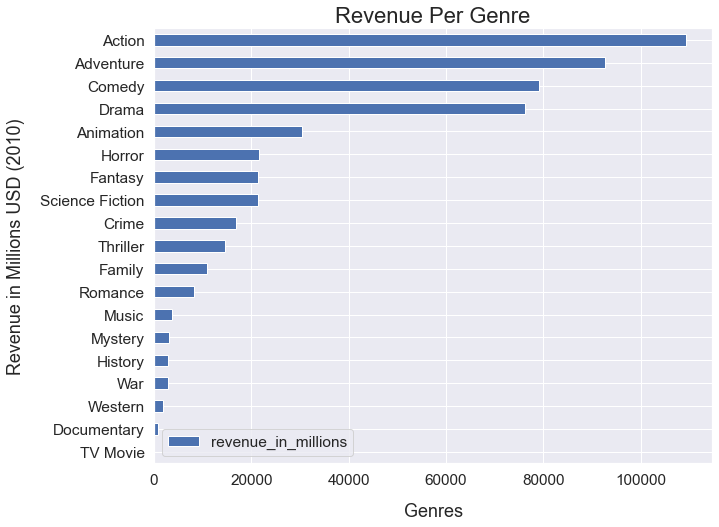

In [30]:
#Plotting the revenue for each genre
ax = genres_revenue.plot(kind = 'barh',figsize =(10,8), legend = True)
#using the plotTitle Function that I created
plotTitle("Revenue Per Genre","Genres", "Revenue in Millions USD (2010)")

<a id='qm7'></a>
> ### Knowing which are the most popular genres
- I'm going to review which genres do better over the years, stayinng with just the top 5 genres.

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

In [56]:
#in order to do this, I'll create a groupby between genres and popularity
genres_pop = df.groupby('genres')["popularity"].median().sort_values(ascending = False)
genres_pop

genres
Animation          1.480497
Adventure          1.282567
Science Fiction    1.271470
Fantasy            1.219279
Family             1.172875
Romance            1.090572
War                0.998128
Action             0.914956
Thriller           0.845295
History            0.824965
Mystery            0.794625
Crime              0.759509
Western            0.747923
Comedy             0.717595
Horror             0.694404
Music              0.693522
Drama              0.648405
TV Movie           0.273628
Documentary        0.221539
Name: popularity, dtype: float64

To **better understand** the data, I drop the genres that I don't want to track, I just want to see the top 8 genres.

In [51]:
# calling the function dropping
dropping()

In [52]:
genre_over_time = test_df.groupby(['release_year','genres'])['popularity'].mean()
genre_over_time

release_year  genres         
1960          Action             1.504538
              Adventure          1.872132
              Comedy             0.501564
              Drama              1.564871
              History            1.136943
                                   ...   
2015          Drama              2.041339
              History            2.258394
              Romance            2.108030
              Science Fiction    7.594638
              Thriller           3.913396
Name: popularity, Length: 419, dtype: float64

In [53]:
genre_over_time = genre_over_time.unstack()
genre_over_time.head(2)

genres,Action,Adventure,Comedy,Drama,History,Romance,Science Fiction,Thriller
release_year,,,,,,,,
1960,1.504538,1.872132,0.501564,1.564871,1.136943,0.501564,NaN,2.610362
1961,0.464139,1.693267,1.244520,0.753022,0.538364,1.752027,NaN,NaN


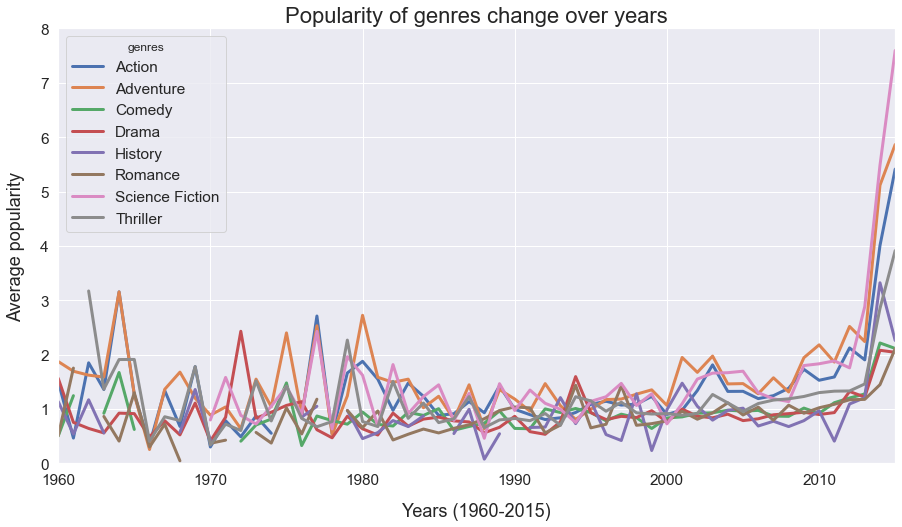

In [54]:
genre_over_time.plot(figsize= (15,8), linewidth=3, xlim = (1960,2015), ylim = (0,8))
plotTitle("Popularity of genres change over years","Years (1960-2015)", "Average popularity")

> In the table above, we can see how is the behavior of the genres over the years, it's amazing how in the latest years, the science fiction genre has been increasing. 

<a id='qm8'></a>
### Top 10 Companies with most revenue

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

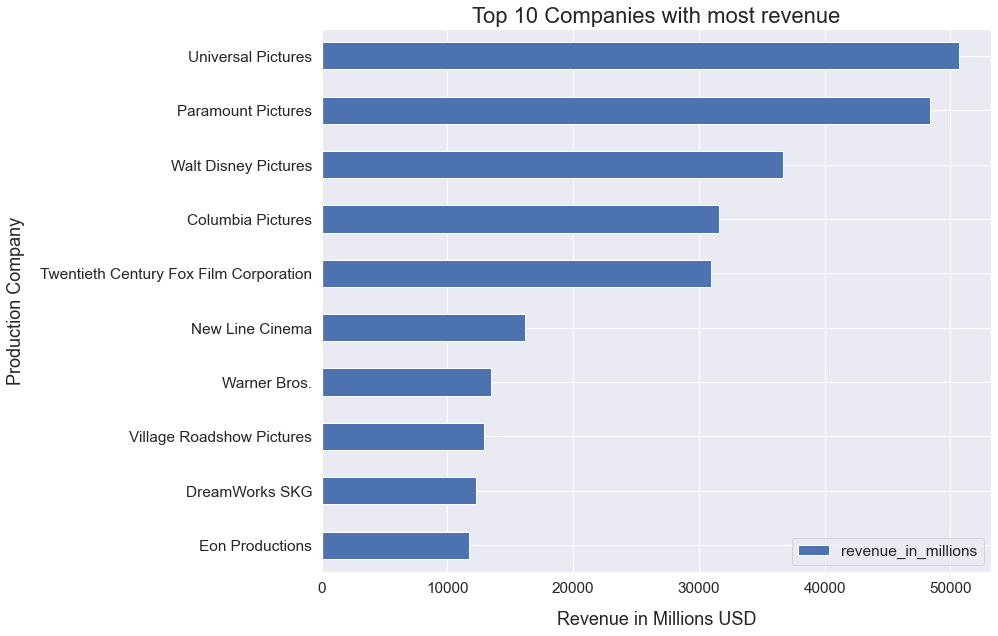

In [57]:
group_by_best10(data = df, column1 = 'production_companies', column2 = 'revenue_in_millions')
plotTitle("Top 10 Companies with most revenue","Revenue in Millions USD", "Production Company")

<a id='qm9'></a>
### Top 10 Companies with less revenue

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

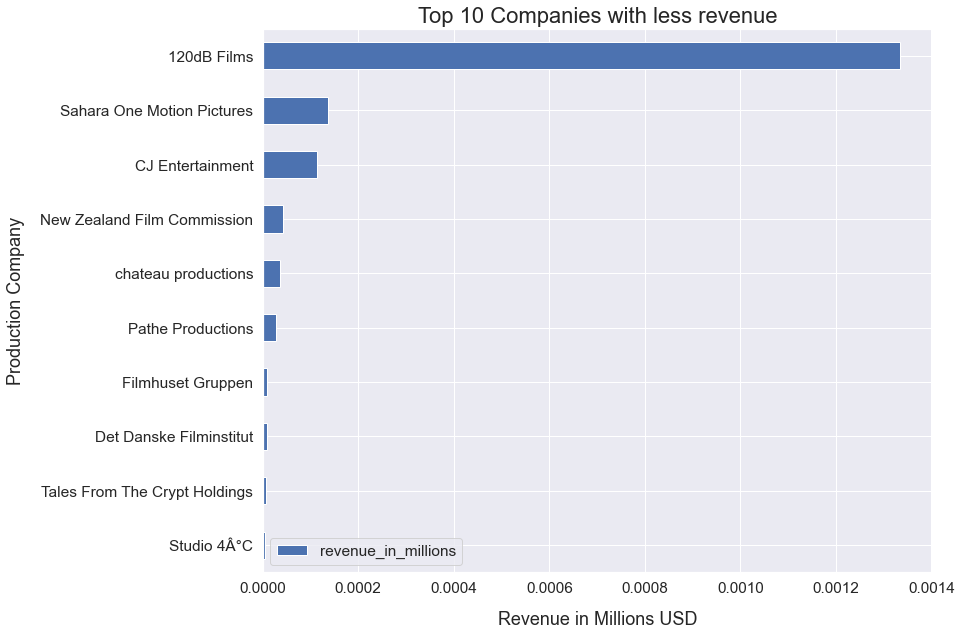

In [37]:
group_by_worst10(data = df, column1 = 'production_companies', column2 = 'revenue_in_millions')
plotTitle("Top 10 Companies with less revenue","Revenue in Millions USD", "Production Company")

<a id='qm10'></a>
### Top 10 Best Paid Actors

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

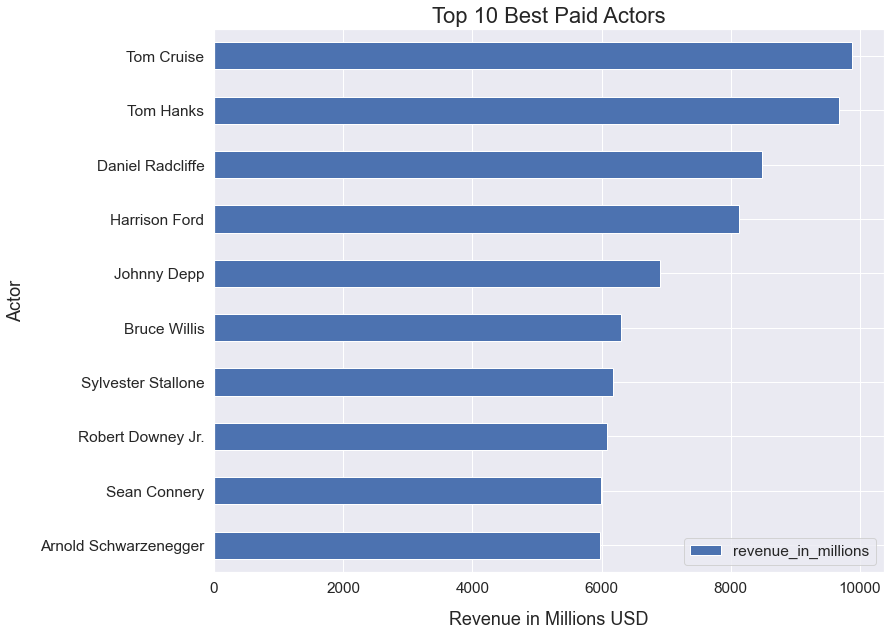

In [38]:
group_by_best10(data = df, column1 = 'cast', column2 = 'revenue_in_millions')
plotTitle("Top 10 Best Paid Actors","Revenue in Millions USD", "Actor")

<a id='qm11'></a>
### Top 10 Worst Paid Actors

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

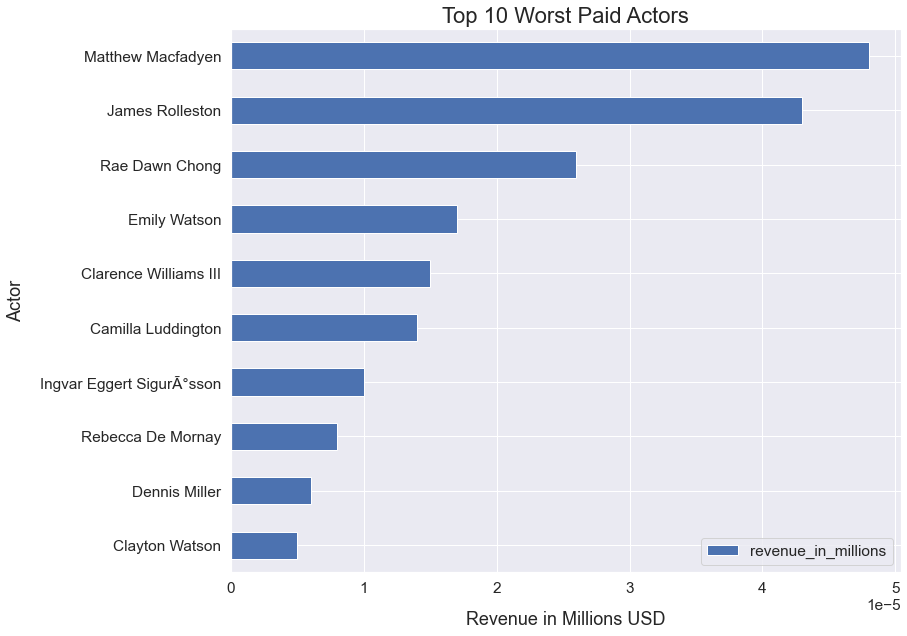

In [39]:
group_by_worst10(data = df, column1 = 'cast', column2 = 'revenue_in_millions')
plotTitle("Top 10 Worst Paid Actors","Revenue in Millions USD", "Actor")

<a id='qm12'></a>
> ### Average Revenue per Genre from 1960-2018
Revenue per Genre, in order to do this I created a groupby function between ```value``` and ```revenue_in_millions```

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

In [40]:
genres_avg_revenue = df.groupby('genres')["revenue_in_millions"].mean().sort_values(ascending = True)

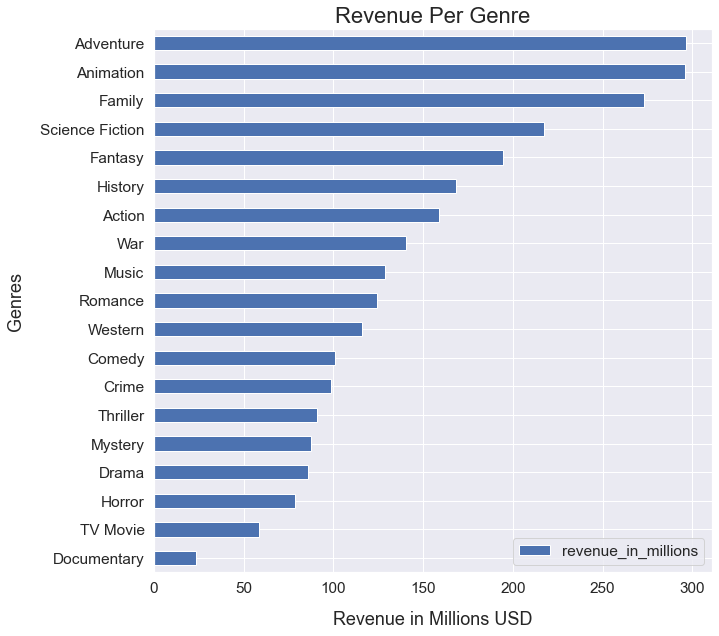

In [41]:
ax = genres_avg_revenue.plot(kind = 'barh',figsize =(10,10), legend = True)
plotTitle("Revenue Per Genre","Revenue in Millions USD", "Genres")

<a id='correlation'></a>
# Correlation between variables exploration

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

<a id='qc1'></a>
> ### Correlation between revenue and budget
- To create this correlation, I first filter where all the values from ```revenue_in_millions``` are positive, because the negative values bias the visualization. 

In [42]:
correlation = df[(df['revenue_in_millions'] >= 0)]
correlation.revenue_in_millions

0       1392.445893
1        348.161292
2        271.619025
3       1902.723130
4       1385.748801
           ...     
3849     226.643572
3850      87.334191
3851      40.308088
3852     134.360293
3853      80.616176
Name: revenue_in_millions, Length: 3850, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


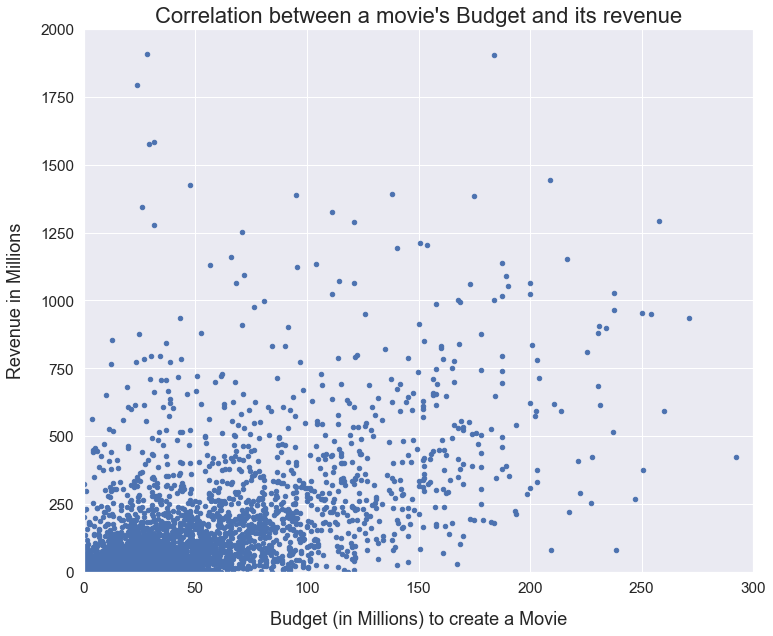

In [43]:
df.plot(x='budget_in_millions', y='revenue_in_millions', kind = 'scatter', figsize = (12,10), ylim = (0,2000), xlim = (0,300))
plotTitle("Correlation between a movie's Budget and its revenue","Budget (in Millions) to create a Movie", "Revenue in Millions")

<a id='qc2'></a>
> ### Correlation between a Movie's Budget and its Popularity
- We can see that there is a positive relationship between this 2 variables. 

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


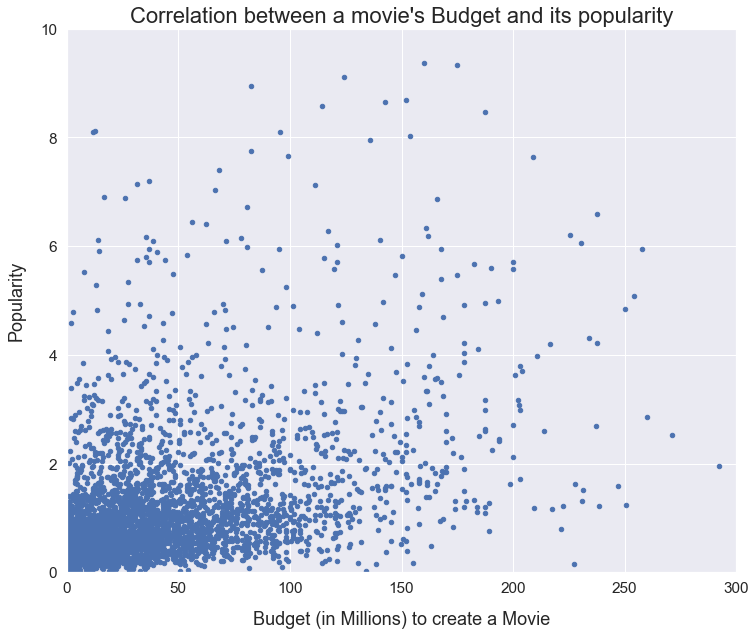

In [44]:
df.plot(x='budget_in_millions', y='popularity', kind = 'scatter', figsize = (12,10), ylim = (0,10), xlim = (0,300))
plotTitle("Correlation between a movie's Budget and its popularity" ,"Budget (in Millions) to create a Movie", "Popularity")

We can also see that there is slightly **positive** relationship between this 2 variables.

<a id='conclusions'></a>
## Conclusions

> - As I analyzed this dataset, I found out that the better the budget, **the better** the chances for the movie to be more popular. I think is also important to get to know how correlations works.
- I also found out that **Action**, **Adventure**, **Drama**, **Commedy** and **Thriller** are the genres that have generated the most revenue from 1965 to 2015. 
- Overall I had a lot of fun analyzing this dataset, and if the reader might have any suggestions on this work, please let me know.

## Limitations:

> - One of the limitations is that the database doesn't have all the movies created by the production company, therefore, the best production companies section might be a little bit bias due to this factor. 
- There should be a better way to deal with duplicate and NaN values, I will do further research in this regard.
- 

<a href="#table_of_contents"><b>Go to Table of Contents</b></a>